# **Comparative study on prediction modeling of chronic heart diseases by implementing different classification algorithms**

We will look into various Python-based data science libraries in an attempt to build a model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach (Methodology) :

- 1. Problem definition
    * Can we predict if somoeone is going to suffer from a heart disease ?
- 2. Data
    * The data is taken from the UCI Machiune learning repository : [UCI Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease)
- 3. Evaluation
    * The goal of the analysis is to reach 95% accuracy at predicting whether or not a patient has heart disease. This will give a conclusion on whether the project needs to proceed or not. 
- 4. Features
- 5. Modelling
- 6. Conclusion


# Chapter 1 - Exploratory data analysis

## 1.1] Importing the necessary libraries and tools

In [1]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt  
import seaborn as sns            
import xgboost as xgb
import math

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib.ticker import MaxNLocator
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, learning_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings  # For Hiding unwanted warnings
warnings.simplefilter('ignore')

from joblib import dump, load

## 1.2] Loading the Data from a csv file

In [2]:
df = pd.read_csv('heart_disease.csv')
df.shape

(303, 14)

### The attributes

- age : The age of the patient, Numeric
- sex : The gender of the patient, 
    - 1 = male, 
    - 0 = female, Binary
- cp : Type of chest pain, Ordinal
    - 1 = typical angina,
    - 2 = atypical angina, 
    - 3 = non-anginal pain
    - 4 = asymptotic
- trestbps : Resting blood pressure in mmHg, Numeric
- chol : Serum Cholesterol in mg/dl, Numeric
- fbs : Fasting Blood Sugar, Binary
    - 1 = fasting blood sugar is more than 120mg/dl, 
    - 0 = otherwise
- restecg : Resting ElectroCardioGraphic results, Ordinal 
    - 0 = normal, 
    - 1 = ST-T wave abnormality, 
    - 2 = left ventricular hypertrophy
- thalach : Max heart rate achieved, Numeric
- exang : Exercise induced angina, Binary 
    - 1 = yes, 
    - 0 = no,
- oldpeak : ST depression induced by exercise relative to rest, Numeric
- slope : Peak exercise ST segment, Ordinal
    - 1 = upsloping,
    - 2 = flat, 
    - 3 = downsloping,
- ca : Number of major vessels, 0–3 colored by fluoroscopy, Ordinal
- thal : Thalassemia, Ordinal
    - 3 = normal, 
    - 6 = fixed defect, 
    - 7 = reversible defect
- num : Diagnosis of heart disease, Ordinal 
    - 0 = absence, 
    - 1, 2, 3, 4 = present


## 1.3] Understanding the Dataset

This function returns the first and last 'n' rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [3]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statistical Information Describe offers us with numerically formatted statistical data. We may deduce from the AGE column that the minimum age is 29 years old and the maximum age is 77 years old, with a mean age of 54 years old. The details of the quartiles are presented in percentages of 25%, 50%, and 75%. The information is split into three quartiles, or four equal portions. As a result, each group has 25% of the values. The standard deviation and mean are statistical measurements that indicate the data set's central tendency. Outliers, on the other hand, affect the mean, thus we need more data to make informed conclusions.

### We will see how many had heart disease and how many did not, Here 1 = Yes, 0 = No

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

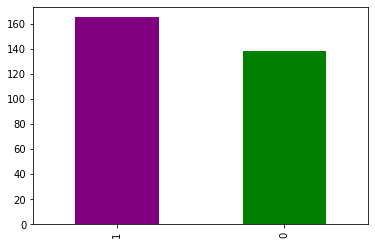

In [7]:
df['target'].value_counts().plot(kind='bar',
                                 color=['purple', 'green']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Are there any missing values?

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart disease frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

### Compare sex vs Target column

In [11]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


#### Observation
From this data we observe that 72 out of 96 women have heart disease. Almost a 75% for this data.

### Heart disease frequency with respect to age

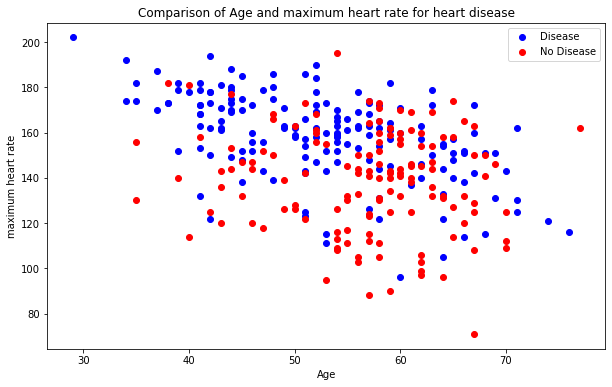

In [13]:
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='blue')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='red')
print()
plt.title("Comparison of Age and maximum heart rate for heart disease")
plt.xlabel("Age")
plt.ylabel("maximum heart rate")
plt.legend(["Disease", "No Disease"]);

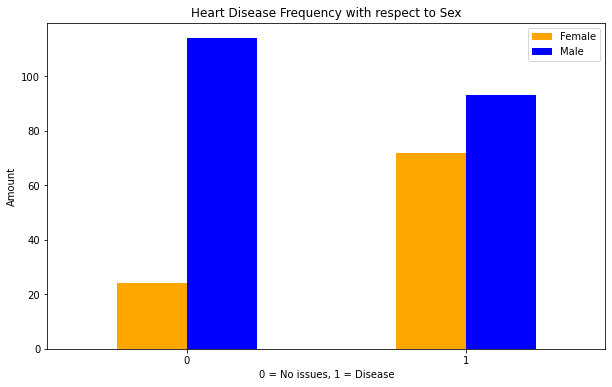

In [12]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                          figsize=(10,6),
                                          color=['orange', 'blue']);
plt.title("Heart Disease Frequency with respect to Sex")
plt.xlabel("0 = No issues, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Check the distribution of the age column

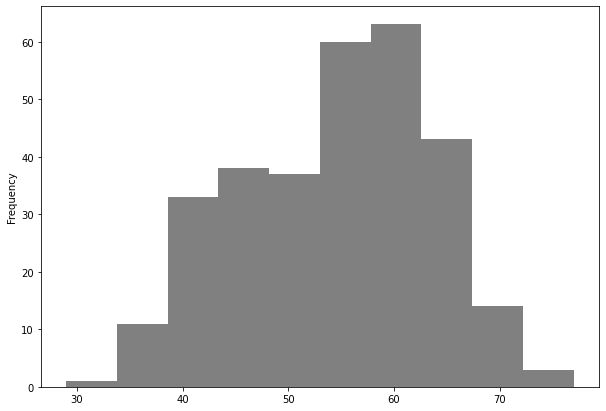

In [65]:
df['age'].plot(kind='hist',
               color='gray');

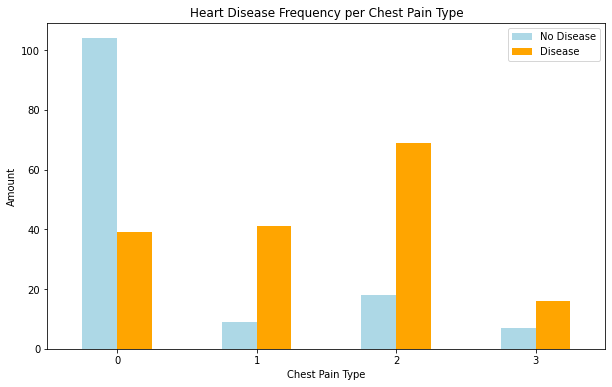

In [66]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['lightblue', 'orange'])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Preparing a correlation matrix

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## 1.4] Plot the correlation matrix

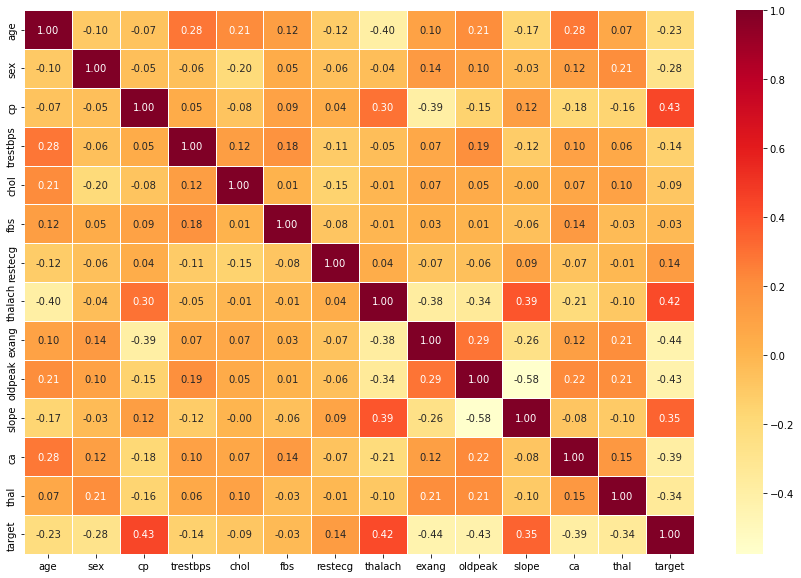

In [18]:
c_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(c_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlOrRd');

#### Observation
- cp, thalach and slope have the strongest positive correlation with target. exang, oldpeak and ca the strongest negative corr.
- It shows that there is no single feature that has a very high correlation with our target value. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.
- Also, some of the features have a negative correlation with the target value and some have positive

## 1.5] Visualization by pairplot

Pairplots are also a great way to immediatly see the correlations between all variables. But you will see me make it with only continous columns from our data, because with so many features, it can be difficult to see each one. So instead I will make a pairplot with only our continous features.

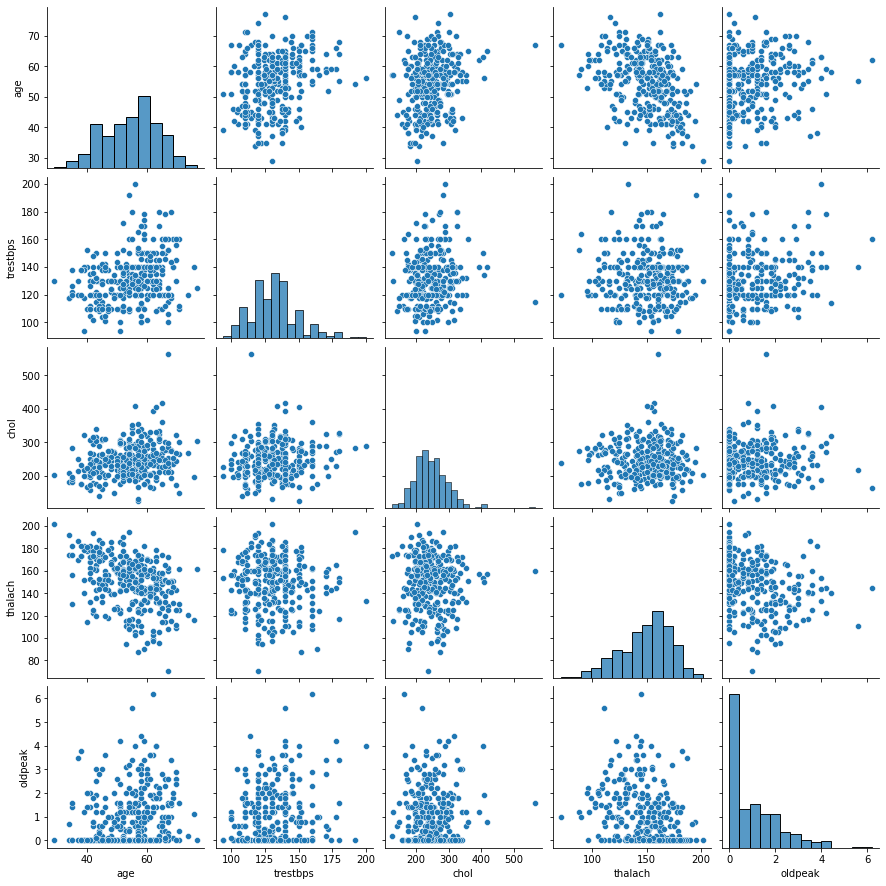

In [19]:
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

## 1.6] Visualization by histogram

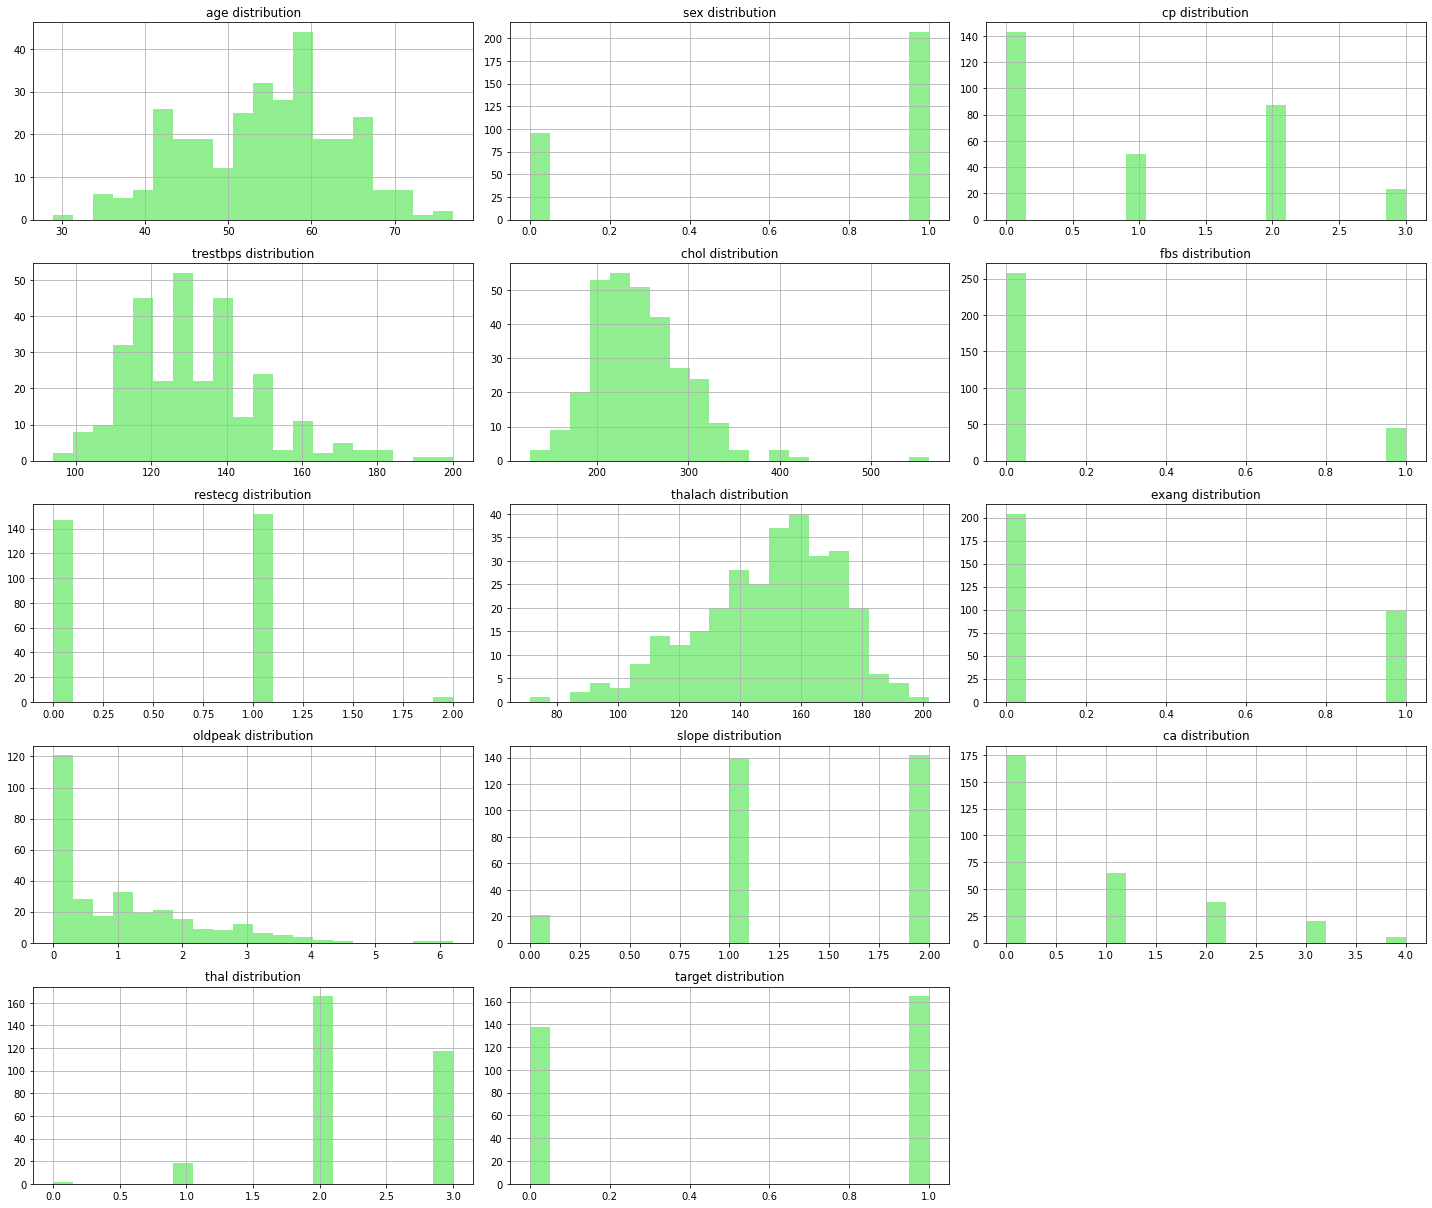

In [69]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='lightgreen')
        ax.set_title(feature+" distribution",color='Black')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

# Chapter 2 - Modeling

## 2.1] Split data into X (independent) & y (dependent)

In [22]:
X = df.drop('target', axis=1)
y = df['target']

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## 2.2] Split into train & test set

In [25]:
np.random.seed(919)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

It is appropriate to use the standard 80-20% split. because we ave 303 rows

In [26]:
X_train.shape, y_train.shape

((242, 13), (242,))

In [27]:
X_test.shape, y_test.shape

((61, 13), (61,))

To Decide what model should we use?
- We shall use scikit-learn machine learning map as a guide: Please refer to the Project report for a detailed map.

- Since we're trying to predict a category, have labeled data and <100k samples, we'll start with a Linear Support Vector Classifier, then go for KNeighbors classifier and RandomForest (Ensemble Classification), MLP, XGBoost and Logistic Regression

- We'll create a function to fit and score all of this models to the data.

We'll use a StandardScaler to speed up convergence for SVG and optimize the training.

In [28]:
scaler = StandardScaler().fit(X_train)
scaler.scale_

array([ 8.73903247,  0.46245928,  1.01424187, 17.55384401, 47.67897309,
        0.34317429,  0.52257617, 22.3991799 ,  0.45716749,  1.18161596,
        0.61999998,  1.01232079,  0.60596042])

## 2.3] Put models in a dictionary

### Let us first start by looking at the prediction accuracy of the chosen classifiers

In [29]:
models = {'LinearSVC': LinearSVC(),
          'KNeighbors': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression(),
          'XGBoost': XGBClassifier(),
          'MLP': MLPClassifier()}

# We'll create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate a ml model, given its type, and train and test data.
    
    Parameters:
        models: a dict of different Sklearn machine learning models
        X_train: training data (independent variables)
        X_test: testing data (independent variables)
        y_train: training labels (dependent variable)
        y_test: testing labels (dependent variable)
    """
    
    # Set random seed
    np.random.seed(919)
    
    # Make a dict to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Adjust data if it's LinearSVC
        X_train_adjusted = scaler.transform(X_train) if name == 'LinearSVC' else X_train
        X_test_adjusted = scaler.transform(X_test) if name == 'LinearSVC' else X_test
        
        # Fit model
        model.fit(X_train_adjusted, y_train)
        
        # Evaluate the model and add to model scores
        model_scores[name] = model.score(X_test_adjusted, y_test)
    
    return model_scores

### Run the function

In [30]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'LinearSVC': 0.8852459016393442,
 'KNeighbors': 0.639344262295082,
 'Random Forest': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442,
 'XGBoost': 0.819672131147541,
 'MLP': 0.8524590163934426}

## 2.4] Comparison of different models 

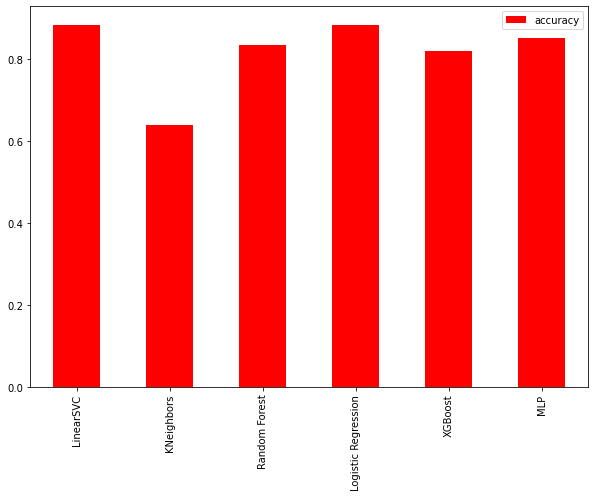

In [71]:
model_comparison = pd.DataFrame(model_scores, index=['accuracy'])
model_comparison.T.plot(kind='bar', color='red');
plt.rcParams["figure.figsize"] = (10,7)

## 2.5] Tuning Hyperparameters with GridSearchCV

Since none of the models reached the desired 90% accuracy, we're gonna try with an exhaustive search Cross Validation with GridSearchCV. We'll use the same grid, and we'll create a functions similar to the ones previously used.

### Cross Validation for Logistic Regression

In [32]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);
# Evaluate the grid search LogisticRegression model
print("Best score:",gs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best score: 0.9016393442622951


### Cross Validation for KNN

In [33]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, y_train)
print("Best score:" + str(knn_cv.best_score_))

Best score:0.6984693877551019


### Cross Validation for LinearSVC

In [34]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 6, 7, 8, 9,  10 , 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50 , 55, 60, 70, 80, 90, 100]}
svc = LinearSVC()
svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 5, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)
print("Best parameters: " + str(svc_cv_model.best_params_))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'C': 35}


In [35]:
svc_tuned = LinearSVC(C = 0.1).fit(X_train, y_train)
y_pred = svc_tuned.predict(X_test)
svc_linear_final = accuracy_score(y_test, y_pred)
print("Best score:",svc_linear_final)

Best score: 0.5573770491803278


### Cross Validation for Random Forest

In [36]:
# CV for Random Forest

rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,3,5,7],
            "n_estimators": [10,100,200,500,1000],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 
rf_cv_model.fit(X_train, y_train)
print("Best Parameters: " + str(rf_cv_model.best_params_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [37]:
rf_tuned = RandomForestClassifier(max_depth = 2, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 100)

rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
rf_final = accuracy_score(y_test, y_pred)


### Cross Validation for XGBoost 

In [38]:
xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", max_depth=1,
                    n_estimators=500,learning_rate=0.05,colsample_bytree=0.35,subsample=0.5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_final = accuracy_score(y_test, y_pred)
print("Best score:",xgb_final)


Best score: 0.8688524590163934


We definetly see an improvement in the predicted values after implementing grid search cross validation with 5 folds. But to evalute them better, we need to look at more evaluation metrics like ROC/AUC, precission, recall and F1 which we will now calculate for all the classifers used about and sort them on basis of F1 score to choose the classiefer we wish to move forward with. 

# Chapter 3 - Performance/Evaluation metrics

We shall be showing: - Classification report : It is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.


- Confusion Matrix : A confusion matrix, also known as an error matrix, is a table that describes how well a classification model (or "classifier") performs on a set of test data for which the true values are known. It enables the visualization of an algorithm's performance. It makes it simple to spot class confusion, such as when one class is frequently mislabeled as the other. The number of right and incorrect predictions is summarized with count values and broken down by each class in the confusion matrix, not just the number of errors committed.


- ROC curve and AUC score : ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.


- Precision : To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labelledas positive is indeed positive (a small number of FP).


- Recall : Recall can be defined as the ratio of the total number of correctly classified positive examplesdivide to the total number of positive examples. High Recall indicates the class is correctlyrecognized (a small number of FN).


- F1-score : It is the harmonic mean of Precision and Recall. It measures the test 
accuracy. The range of this metric is 0 to 1

In [39]:
LinearSVC =  LinearSVC()
KNeighbors =  KNeighborsClassifier()
Random_Forest = RandomForestClassifier()
Logistic_Regression = LogisticRegression()
XGBoost = XGBClassifier()
MLP = MLPClassifier()

In [40]:
cv = KFold(5, shuffle=True, random_state=919)

classifiers = [LinearSVC,KNeighbors,Random_Forest, Logistic_Regression,XGBoost,MLP]

In [41]:
def model_check(X, y, classifiers, cv):
    
    ''' A function for testing multiple classifiers and return several metrics. '''
    
    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name
        
        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results[
            'train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results[
            'test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results[
            'train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results[
            'test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results[
            'train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results[
            'test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()


        row_index += 1        

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [72]:
raw_models = model_check(X, y, classifiers, cv)
display(raw_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
3,LogisticRegression,0.923541,0.908163,0.029345,0.853151,0.841639,0.035264,0.872233,0.858745,0.038608,0.020599
5,MLPClassifier,0.921794,0.892007,0.023322,0.855620,0.818743,0.044612,0.873112,0.836505,0.045894,0.196852
2,RandomForestClassifier,1.000000,0.906461,0.010127,1.000000,0.798852,0.030929,1.000000,0.819054,0.031632,0.118819
4,XGBClassifier,1.000000,0.885544,0.018208,1.000000,0.802022,0.022965,1.000000,0.817581,0.029436,0.091019
1,KNeighborsClassifier,0.842583,0.678879,0.017569,0.765677,0.636940,0.010945,0.792700,0.671614,0.033930,0.002801
0,LinearSVC,0.910365,0.896347,0.037964,0.732708,0.718962,0.106606,0.668873,0.668533,0.192418,0.012003


## 3.1] Plotting confusion matrix for all classifers

In [75]:
def conf_mat(X,y, classifiers):
    
    ''' A function for displaying confusion matrices'''
    
    fig, axes = plt.subplots(4,2, figsize=(20,20))
    
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):
        classifier.fit(X,y)
        plot_confusion_matrix(classifier, X, y,
                                         values_format = 'n',
                                         display_labels = ['No Disease', 'Diease'],
                                         cmap=plt.cm.Blues,ax=ax)
        ax.set_title(f'{classifier.__class__.__name__}')
        ax.grid(False)
        plt.tight_layout()

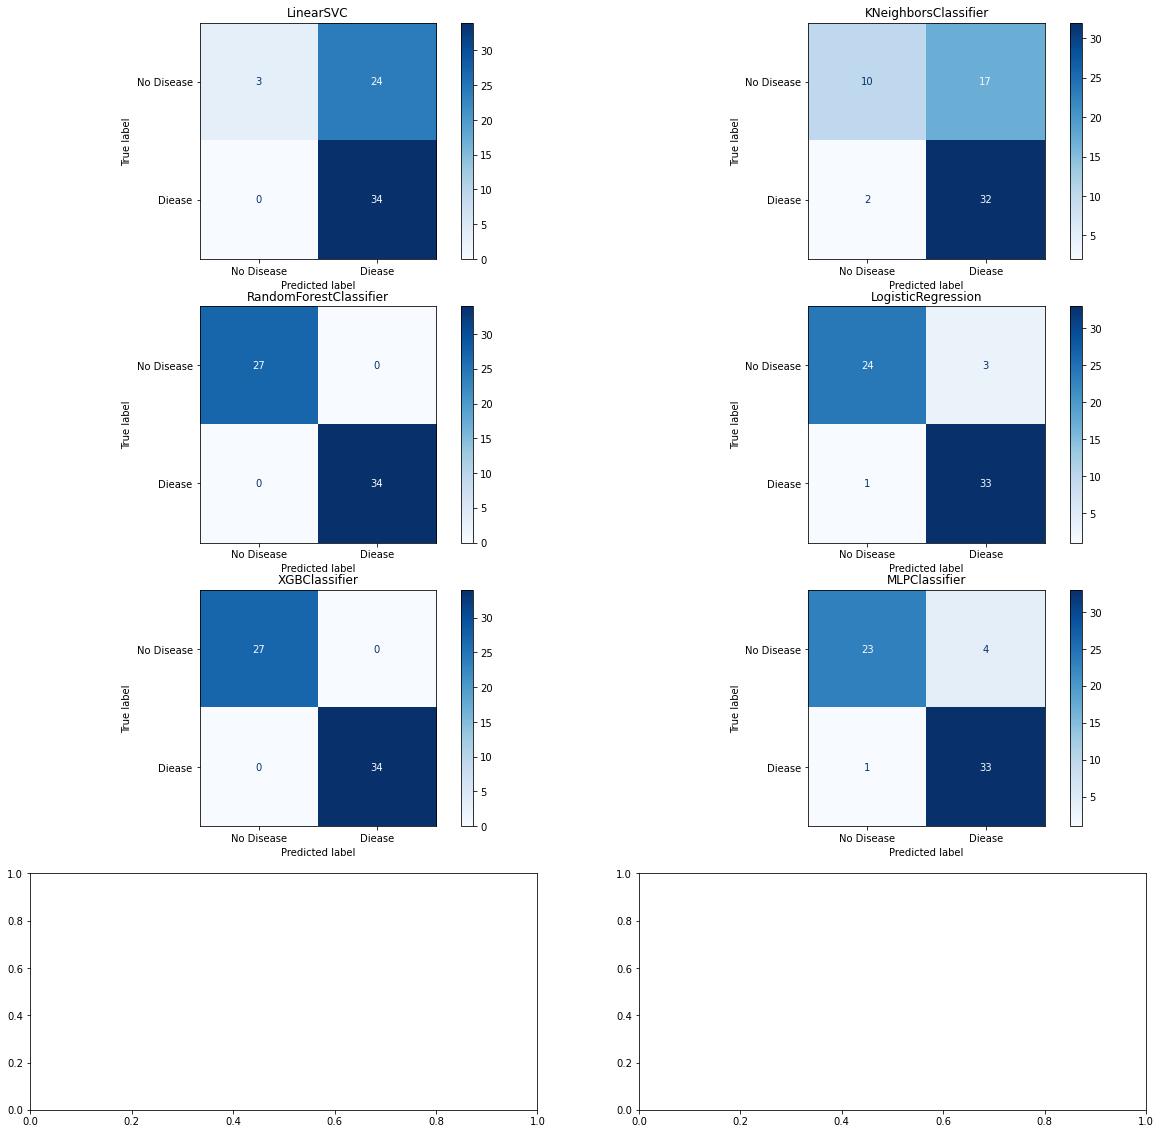

In [76]:
conf_mat(X_test, y_test, classifiers)

## 3.2] Plotting Learning curves for all classifers

Learning curves are plots that show changes in learning performance over time in terms of experience. Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or well-fit model

In [45]:
def plot_learning_curve(classifiers,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    ''' A function for displaying learning curvers fur multiple ml algorithms'''

    fig, axes = plt.subplots(math.ceil(len(classifiers) / 2),
                             2,
                             figsize=(25, 50))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        ax.set_title(f'{classifier.__class__.__name__} Learning Curve')
        if ylim is not None:
            ax.set_ylim(*ylim)
        ax.set_xlabel('Training examples')
        ax.set_ylabel('Score')

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(classifier, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, scoring='f1', random_state=919
                          )
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curve

        ax.fill_between(train_sizes,
                        train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std,
                        alpha=0.1,
                        color='r')
        ax.fill_between(train_sizes,
                        test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std,
                        alpha=0.1,
                        color='g')
        ax.plot(train_sizes,
                train_scores_mean,
                'o-',
                color='r',
                label='Training score')
        ax.plot(train_sizes,
                test_scores_mean,
                'o-',
                color='g',
                label='Cross-validation score')
        ax.legend(loc='best')
        ax.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.show()

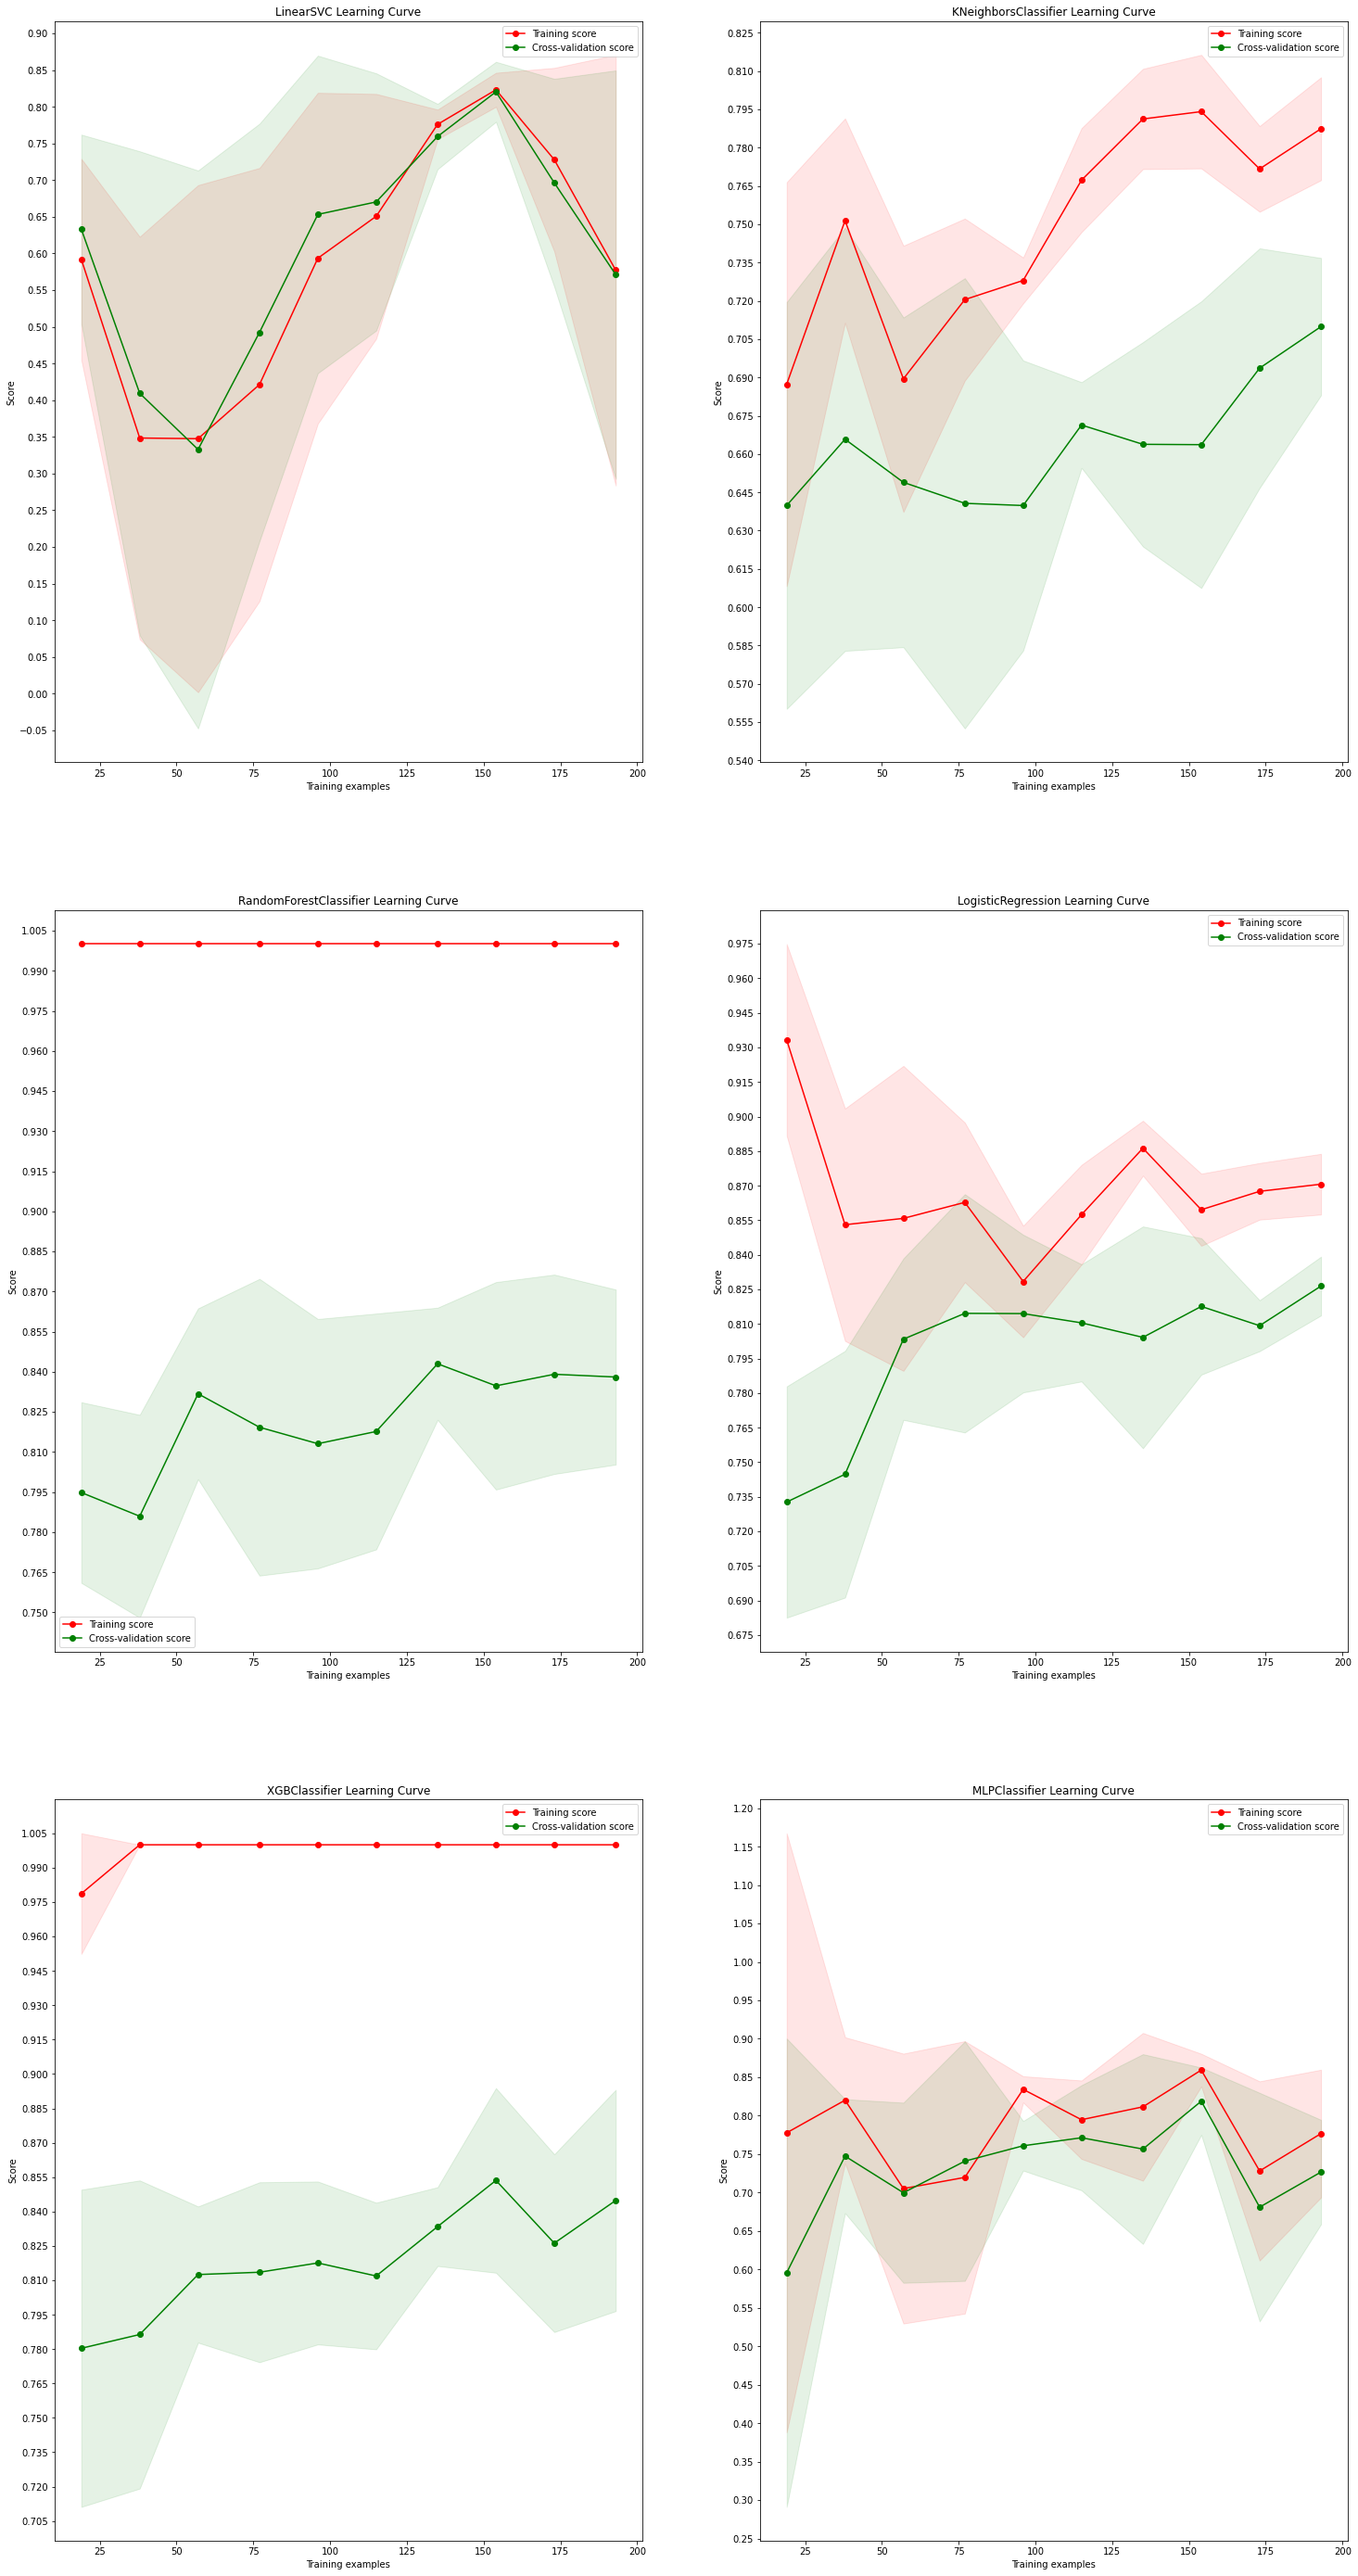

In [46]:
# Displaying learning curves:

plot_learning_curve(classifiers,
                    X_train,
                    y_train,
                    ylim=None,
                    cv=cv,
                    n_jobs=-1,
                    train_sizes=np.linspace(.1, 1.0, 10))

# Chapter 4 - Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"
Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model

In [60]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [61]:
# Check coef_
clf.coef_

array([[-0.00128666, -0.88885478,  0.68593453, -0.01814614, -0.00182858,
         0.00671474,  0.34401123,  0.03198404, -0.50544692, -0.50920292,
         0.29493492, -0.55198731, -0.60164862]])

In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.0012866603932229265,
 'sex': -0.8888547752041946,
 'cp': 0.685934526229383,
 'trestbps': -0.018146136918123057,
 'chol': -0.001828580373959459,
 'fbs': 0.006714735860261004,
 'restecg': 0.3440112253138953,
 'thalach': 0.03198403984186737,
 'exang': -0.5054469159709654,
 'oldpeak': -0.509202916804836,
 'slope': 0.2949349214005445,
 'ca': -0.5519873126855189,
 'thal': -0.6016486229579333}

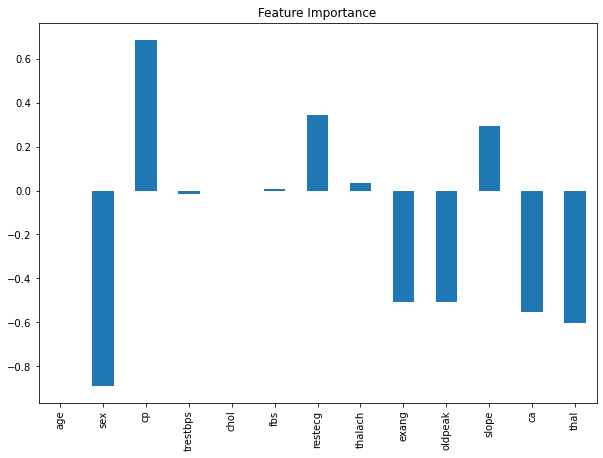

In [64]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);


# Chapter 5 - Conclusion

The coding was done to prepare the data, visualize it, pre-process it, build the model, and evaluate it. The code was written in the Python programming language with the help of the Jupyter Notebook IDE. All of the experiments and model creation are done with python libraries. A single prediction model is developed based on a comparison of all seven machine learning approaches. It is evident from the results that the accuracy of the logistic regression yields the highest accuracy, followed by random forest, XGboost, MLP, KNeighbors, and Linear support vector classifiers with the least accuracy. It was still a question whether increasing the data set or attributes had the same impact on the accuracy results. Hence, cross-validation of each classifier was necessary to test the model more precisely. To avoid vague approximations and to examine trends and correlations between our data, evaluation of Test and train mean, Test & Train F1 mean, and standard deviations, train & Test accuracy mean & standard deviation has been done. The correlation is the bridge between various attributes; take cholesterol, for example; it shows a positive correlation as the value of cholesterol increases resulting in higher chances of heart disease. We have achieved a prediction accuracy of about 90% for Logistic regression, Random forest and XGBoost. XGBoost (Extreme Gradient Boosting) model was used as it is a better model generally for classification, regression and ranking problems. Although speaking in terms of medical standards, it might not seem that good, but our model does predict a heart disease correctly 9 out 10 times.

Possible Scope of improvement:
- Find better dataset
- Improve model parameters with more careful tuning to check if further improvement can be achieved.
